# Vector Embeddings

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE
import pandas
import nltk

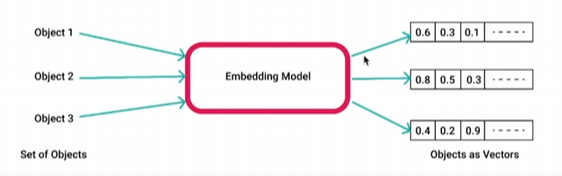

ChatGPT verwendet intern transformatorbasierte neuronale Netzwerkmodelle, die auf einer Architektur namens "Transformer" basieren. Diese Modelle erzeugen und nutzen Vektoreinbettungen (auch bekannt als Vector Embeddings), um die Bedeutung von Wörtern und Phrasen im Kontext zu verstehen. Die spezifischen Vektoreinbettungen, die in ChatGPT verwendet werden, sind Teil des Modelltrainings und -designs, das auf großen Textdaten basiert.

Die Einbettungen in diesen Modellen sind hochdimensionale Vektoren, die jedes Wort oder jede Phrase repräsentieren. Während des Trainings lernt das Modell, diese Vektoren so anzupassen, dass ähnliche oder verwandte Wörter und Phrasen ähnliche Vektoren erhalten. Diese Vektoren ermöglichen es dem Modell, den Kontext und die semantischen Beziehungen zwischen den Wörtern zu erfassen, was entscheidend für das Verständnis und die Generierung von natürlicher Sprache ist.

<img src="../img/vectorEmbedding.png" width="800">


<img src="../img/vector.png" width="800">

# train word to vec

King - man + woman = Queen

<img src="../img/vecMath.png" width="800">

In [ ]:
#Load data
file = open('../vec_data/royal.txt', 'r')
data = file.readlines()
print(data)
file.close()

In [ ]:
for i in range(len(data)):
    data[i] = data[i].lower().replace('\n', '')

print(data)

"Stopwords" sind Wörter, die in einer Sprache häufig vorkommen, aber oft wenig inhaltlichen Wert für die Analyse von Textdaten haben. Dazu gehören beispielsweise Artikel, Präpositionen und Pronomen wie "der", "und", "in", "sie" usw.

Bei der Technik des Word Embedding, die dazu dient, Wörter in vektorielle Darstellungen umzuwandeln, werden Stopwords oft entfernt, um verschiedene Gründe:

1. **Rauschreduktion:** Stopwords tragen oft keine bedeutende semantische Information zu einem Text bei. Ihre Entfernung hilft dabei, die wesentlichen Inhalte und Themen in den Textdaten hervorzuheben.

2. **Effizienz:** Die Entfernung von Stopwords kann die Größe des Vokabulars deutlich reduzieren. Dies vereinfacht und beschleunigt die Verarbeitung von Textdaten, da weniger Daten verarbeitet werden müssen.

3. **Verbesserung der Modellleistung:** In vielen NLP-Anwendungen kann das Entfernen von Stopwords die Leistung von Algorithmen verbessern, indem es die Wahrscheinlichkeit verringert, dass das Modell irrelevante Informationen lernt.

Allerdings ist die Entfernung von Stopwords nicht immer notwendig oder vorteilhaft. In manchen Anwendungsfällen, insbesondere wenn die syntaktische Struktur von Text wichtig ist (wie bei Sprachmodellen), können Stopwords wichtige Informationen über die Struktur und Bedeutung eines Satzes liefern. Daher hängt die Entscheidung, Stopwords zu entfernen, oft von der spezifischen Anwendung und dem Ziel der Textanalyse ab.

In [ ]:
#Removing stop words
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []
for sent in data:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

Ein Bigram ist ein Konzept aus der Sprachverarbeitung, das zwei aufeinanderfolgende Wörter in einem Text oder einer Rede umfasst. Es gehört zu den n-Grammen, wobei ein n-Gramm eine Sequenz von \( n \) Elementen aus einem gegebenen Text ist. Im Fall von Bigrams sind diese Elemente Wörter, und \( n \) ist gleich 2.

**Nutzung von Bigrams:**

1. **Sprachmodellierung:** Bigrams werden verwendet, um statistische Sprachmodelle zu erstellen, die vorhersagen können, welches Wort wahrscheinlich als nächstes in einem Text kommt. Diese Modelle sind grundlegend für Anwendungen wie Textvorhersage und automatische Übersetzung.

2. **Feature-Generierung für maschinelles Lernen:** In der Textanalyse können Bigrams als Features verwendet werden, um Maschinenlernalgorithmen zu trainieren. Indem man die Häufigkeit von Bigrammen in Dokumenten misst, kann man ein detaillierteres Bild von den Themen und Stilen der Texte erhalten.

3. **Textanalyse:** Bigrams helfen dabei, Muster in der Textnutzung zu erkennen und können beispielsweise bei der Sentimentanalyse oder bei der Erkennung von Autorstilen nützlich sein.

4. **Verschlüsselung und Sicherheit:** In der Kryptographie können Bigrams zur Analyse der Häufigkeit von Buchstabenkombinationen in verschlüsselten Nachrichten verwendet werden, um die Verschlüsselung zu brechen oder Schwachstellen in Sicherheitssystemen zu identifizieren.

Die Effektivität von Bigrams im Vergleich zu Unigrams (einzelne Wörter) oder Trigrams (drei aufeinanderfolgende Wörter) hängt stark von der spezifischen Anwendung ab. Während Unigrams manchmal zu simplistisch sind, um Kontext zu erfassen, und Trigrams möglicherweise zu spezifisch sind und dadurch zu Datenverdünnung führen können, bieten Bigrams oft einen guten Kompromiss zwischen Kontexterfassung und Datendichte.

In [ ]:
#Creating bigrams
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])
            

print(bigrams)

In [ ]:
#Getting a list of unique words
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

In [ ]:
#Creating dictionary of words
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

In [ ]:
#Performing one-hot encoding
onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

In [ ]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

In [ ]:
#Model
embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)


In [ ]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

print(word_embeddings)

In [ ]:
plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.show()
#plt.savefig('img.jpg')

King - man + woman = Queen

<img src="../img/output_royal.png" width="700">

# Word2Vec with gensim
https://pypi.org/project/gensim/

https://code.google.com/archive/p/word2vec/ -> https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g (1,5GB pretrained model)

The model contains 300-dimensional vectors for 3 million words and phrases

In [ ]:
#model isn't uploadet in git :)
model = KeyedVectors.load_word2vec_format('../google_w2v_model/GoogleNews-vectors-negative300.bin', binary=True, limit=100000)

In [ ]:
model['man']

In [ ]:
len(model['man'])

In [ ]:
model.most_similar('man')

In [ ]:
model.most_similar_cosmul('man') #??

## King - man + woman = Queen

In [ ]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar(vec)

In [ ]:
vec = model['Germany'] - model['Berlin'] + model['Paris']
model.most_similar(vec)

## 2D Visualization of Word Vectors

In [ ]:
words = ['man', 'woman', 'king', 'queen']
vectors = np.array([model[word] for word in words])

In [ ]:
# t-SNE zur Reduktion auf 2 Dimensionen anwenden, mit einer kleinen Perplexity
tsne = TSNE(n_components=2, random_state=0, perplexity=2)
vectors_reduced = tsne.fit_transform(vectors)

In [ ]:
plt.figure(figsize=(16, 8))
for i, word in enumerate(words):
    plt.scatter(vectors_reduced[i, 0], vectors_reduced[i, 1], label=word)
    plt.annotate(word, (vectors_reduced[i, 0], vectors_reduced[i, 1]))
plt.legend()
plt.title('2D Visualization of Word Vectors')
# plt.xlabel('Dim1')
# plt.ylabel('Dim2')
#plt.grid(True)
plt.show()

In [ ]:
def printVector(words):
    vectors = np.array([model[word] for word in words])
    tsne = TSNE(n_components=2, random_state=0, perplexity=2)
    vectors_reduced = tsne.fit_transform(vectors)
    plt.figure(figsize=(16, 8))
    for i, word in enumerate(words):
        plt.scatter(vectors_reduced[i, 0], vectors_reduced[i, 1], label=word)
        plt.annotate(word, (vectors_reduced[i, 0], vectors_reduced[i, 1]))
    plt.legend()
    plt.title('2D Visualization of Word Vectors')
    #plt.grid(True)
    plt.show()

In [ ]:
words = ['doctor', 'health', 'hospital', 'Diagnosis', 'Prevention']
printVector(words)

In [ ]:
words = ['doctor', 'health', 'hospital', 'Diagnosis', 'Prevention', 'tree', 'bike', 'holiday', 'fun']
printVector(words)